# **Colabユーザー向け 注意事項**

# **このファイルに直接書き込まないでください—作業が消えることがあります！**

# **作業を始める前に必ずコピーを作成しましょう。**

コピーの作り方

1. 左上の「File」をクリック。
> *もし「File」や「Runtime」などのメニューが見当たらなければ、右上の「v」マークを押してメニューを表示してください。*

2. 「Save a copy in Drive」を選択。

3. コピーしたファイル名を「YOURNAMEs_FileName.ipynb」に変更。
> 例：名前がOliviaの場合 → Olivias_FileName.ipynb



---

* チェックマーク（✅）は保存されません。Chromeの再読込ボタンでページを更新すると消えてしまいます。<br>
途中で作業を中断するときは、テキストセルを追加して「SO FAR DONE」などと書いておくと便利です。

---

* Colabでは、**30分〜90分ごとに以前の実行結果がリセットされます**。<br>
そのため、`~~ is not defined` のようなエラーが**頻繁に**発生します。

  🔁 `~~ is not defined` エラーが出たときの対処法
  1. まず変数名のスペルが正しいか確認しましょう。<br>
  2. スペルが合っているのにエラーが出る場合は、**再実行したいセルをクリックしてください**。<br>
  3. 左上の「Runtime」→「Run before」をクリック。<br>
     → これで**それ以前のすべてのセルが再実行されます**。
  4. もう一度そのセルを実行。

  これでもうまくいかない場合は、前のセルで回答したTODOに間違いがあるかもしれません。<br>
  答えをもう一度チェックしてください。<br>
  それでもわからなければ、ChatGPTなどのコーディングアシスタントに聞いてみましょう。

# **Chapter 4: EmbeddingModule**

### **Section 0: Preparation**

このセクションでは、以前のチャプターの内容を読み込むだけです。<br>
コードを実行するだけでOK、読む必要はありません。<br>
遠慮なく飛ばして先に進んでください。<br>

In [ ]:
# ファイルをダウンロードする
!wget https://raw.githubusercontent.com/HayatoHongo/Everyones_nanoGPT/main/input.txt -O input.txt
# utf-8でダウンロードしたinput.textファイルを読み込む。
with open("input.txt", 'r', encoding = 'utf-8') as f:
    text = f.read()

# テンソルを見やすく表示する関数（任意）
import torch
import torch.nn as nn

def print_formatted_tensor(*args, width=6, decimals=2):
    """
        A function that neatly formats and displays a PyTorch Tensor, and also prints its size.

    Example usage:
        print_formatted_tensor("名前", tensor)
        print_formatted_tensor(tensor)

    Args:
        *args: If given 1 argument, it is treated as a tensor.
               If given 2 arguments, the first is treated as the name, the second as the tensor.
        width (int): Display width for each number (default: 6)
        decimals (int): Number of decimal places to show (default: 2)
    """
    
    # 引数からテンソルと名前を特定する
    if not args:
        raise ValueError("At least one argument is required.")
    if isinstance(args[0], str):
        if len(args) < 2:
            raise ValueError("Tensor is not specified.")
        name, tensor = args[0], args[1]
    else:
        name, tensor = None, args[0]

    # Tensorをリストに変換する
    tensor_list = tensor.detach().cpu().tolist()

    def format_list(lst, indent):
        """再帰的な入れ子リストを整形して文字列を返す"""
        # 内容がリストなら再度返す
        if isinstance(lst, list) and lst and isinstance(lst[0], list):
            inner = ",\n".join(" " * indent + format_list(sub, indent + 2) for sub in lst)
            return "[\n" + inner + "\n" + " " * (indent - 2) + "]"
        # 数字リスト用
        return "[" + ", ".join(f"{v:{width}.{decimals}f}" for v in lst) + "]"

    # 整形済み文字列（最外枠の角括弧を除く）
    formatted = format_list(tensor_list, indent=9)
    inner_formatted = formatted[1:-1].strip()

    # 結果出力
    if name:
        print(name)
    print(f"Tensor Size: {list(tensor.size())}")
    print("テンソル([")
    print("# TODO: カスタマイズを追加してください" * 9 + inner_formatted)
    print("了解しました" * 7 + "])")

class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        # 語彙数x埋め込み次元数の埋め込みテーブルを定義する
        self.token_embedding_table = nn.Embedding(vocab_size, embedding_dim)

    def embed(self, input_indices):
        # 入力インデックスに対応する埋め込みベクトルを取得する
        return self.token_embedding_table.forward(input_indices)

# 位置埋め込みモジュールの定義
class PositionEmbedding(nn.Module):
    def __init__(self, input_sequence_length, embedding_dim):
        super().__init__()
        # 位置埋め込みレイヤー
        self.position_embedding_layer = nn.Embedding(input_sequence_length, embedding_dim)

    def forward(self, input_indices):
        sequence_length = input_indices.shape[1]  # 配列長を取得する
        position_indices = torch.arange(sequence_length, device=input_indices.device)  # 位置インデックス生成
        position_embeddings = self.position_embedding_layer(position_indices)  # 位置埋め込み
        return position_embeddings

--2025-07-03 10:56:14--  https://raw.githubusercontent.com/HayatoHongo/nanoGPT_todo/main/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.06s   

2025-07-03 10:56:14 (17.8 MB/s) - ‘input.txt’ saved [1115394/1115394]



### **Section 1: __init__**

Token EmbeddingとPosition Embeddingのインスタンスを作成する

In [ ]:
torch.manual_seed(1337)
token_embedding_layer = TokenEmbedding(vocab_size = 65, embedding_dim = 8)
position_embedding_layer = PositionEmbedding(input_sequence_length = 8, embedding_dim = 8)

**Section 1: init** <label><input type="checkbox"> Mark as Done</label>

### **Section 2: forward**

In [ ]:
# Let's heと互換性があります。（バッチサイズ、トークン長）=（1、8）
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])

token_embeddings = token_embedding_layer.embed(sample_input_tokens)
position_embeddings = position_embedding_layer.forward(sample_input_tokens)

print_formatted_tensor("トークン埋め込み", token_embeddings)
print_formatted_tensor("位置埋め込み", position_embeddings)

token_embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.19,  -0.34,   1.80,   1.39,   1.08,  -0.61,  -0.46,   0.57],
           [ -0.65,  -0.69,   0.26,  -1.27,   0.26,  -0.64,   1.08,  -0.80],
           [  0.20,  -1.57,  -2.12,  -1.18,   0.08,   0.65,  -0.50,  -0.22],
           [ -0.51,  -0.92,   0.55,  -1.49,  -1.21,   0.57,  -0.60,  -0.69],
           [ -1.62,   0.45,   0.50,  -0.77,  -1.08,   0.00,   0.00,   0.08],
           [  0.36,   1.17,  -1.35,  -0.51,   0.24,  -0.24,  -0.92,   1.54],
           [ -0.38,  -1.89,   0.56,   0.86,  -0.85,   0.50,  -0.97,  -0.73],
           [ -0.65,  -0.69,   0.26,  -1.27,   0.26,  -0.64,   1.08,  -0.80]
         ]
       ])
position_embeddings
Tensor Size: [8, 8]
tensor([
         [  0.45,  -1.17,   1.60,  -0.83,   0.33,   0.76,  -0.66,  -0.43],
         [  0.34,  -0.34,   0.59,   1.01,  -2.68,   0.46,   0.44,  -0.95],
         [ -1.19,   1.36,   0.59,   0.35,   1.53,   0.41,  -0.30,   0.12],
         [ -0.88,   0.83,   0.

**トークン埋め込み + 位置埋め込み**

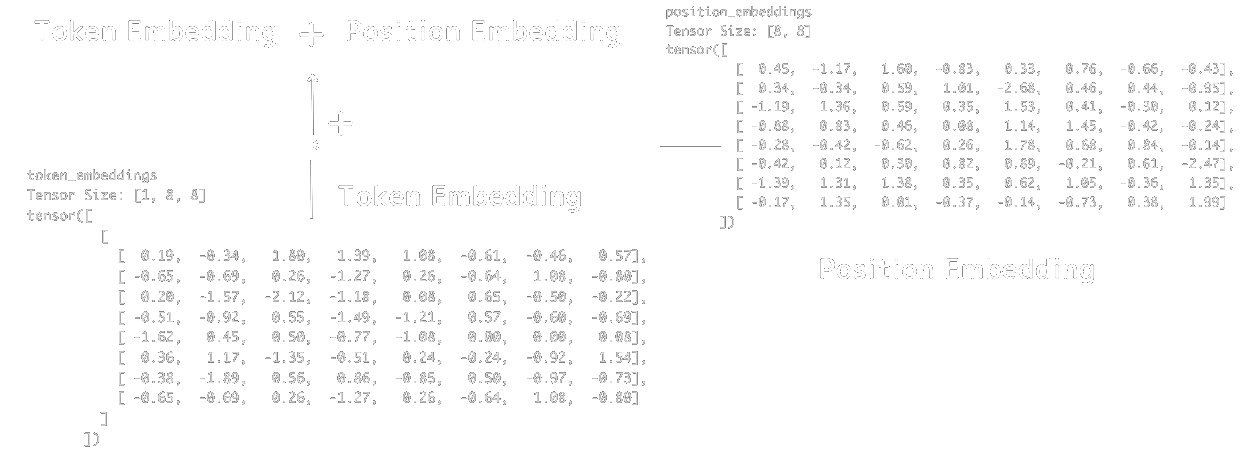

位置埋め込みにはバッチ次元がありません。<br>
例えば、形状が[8, 8]の `position embeddings` を<br>
形状が[batch_size, 8, 8] の `token embeddings` テンソルに足したとします。<br>
エラーは起こりません。<br>
PyTorchは位置埋め込みを `batch_size` 回コピーして、各バッチに加算してくれます。<br>

この自動展開のことを「ブロードキャスティング」と呼びます。

PyTorchでは、多くの操作がバッチ次元の有無にかかわらず動作します。<br>

In [ ]:
embeddings = token_embeddings + position_embeddings # TODO: トークン埋め込みベクトルと位置埋め込みベクトル
print_formatted_tensor("埋め込み", embeddings)

embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.64,  -1.51,   3.40,   0.56,   1.41,   0.14,  -1.12,   0.14],
           [ -0.31,  -1.02,   0.84,  -0.26,  -2.42,  -0.19,   1.52,  -1.75],
           [ -0.99,  -0.21,  -1.53,  -0.83,   1.61,   1.06,  -0.80,  -0.09],
           [ -1.39,  -0.10,   1.01,  -1.41,  -0.06,   2.02,  -1.02,  -0.94],
           [ -1.90,   0.03,  -0.12,  -0.51,   0.70,   0.68,   0.84,  -0.06],
           [ -0.06,   1.28,  -1.05,   0.31,   1.13,  -0.45,  -0.31,  -0.93],
           [ -1.77,  -0.58,   1.94,   1.21,  -0.22,   1.55,  -1.32,   0.62],
           [ -0.82,   0.67,   0.26,  -1.64,   0.13,  -1.37,   1.46,   1.19]
         ]
       ])


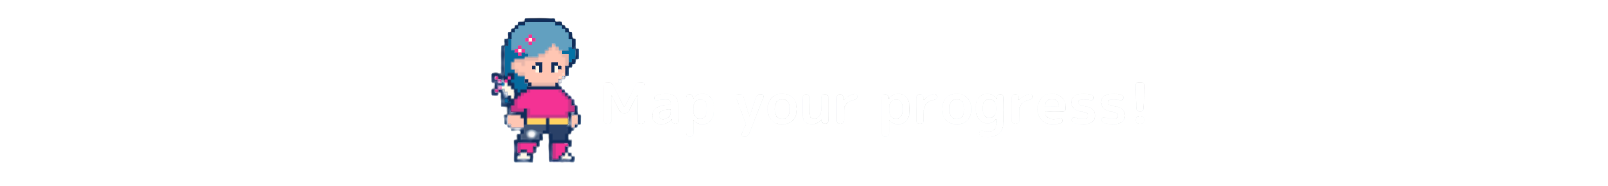

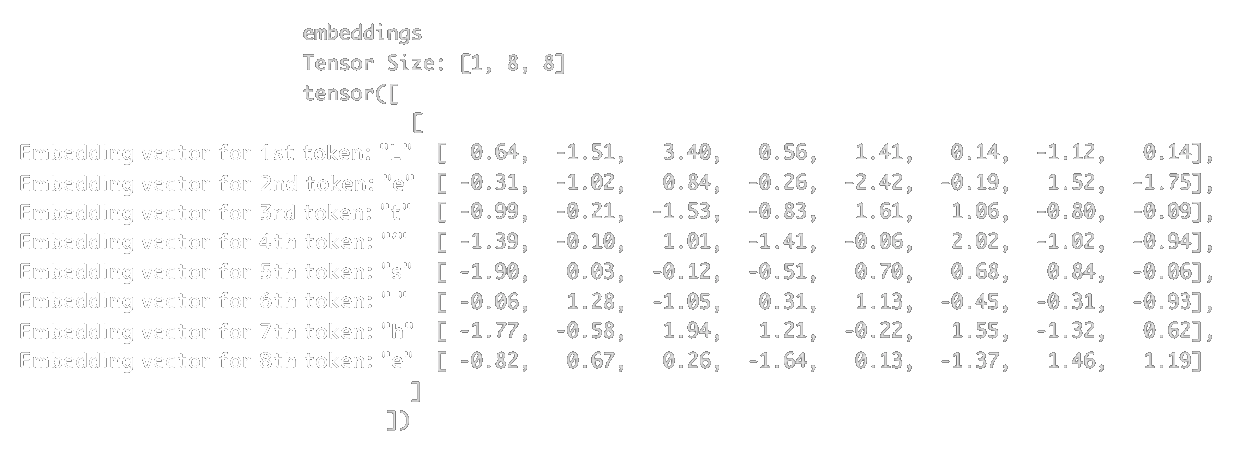

**Section 2: forward** <label><input type="checkbox"> Mark as done</label>

### **Section 3: クラスを定義する**

🔘 **Options**: 使わない余計なオプションがあるかもしれません。

`TokenEmbedding`　　`PositionEmbedding`　　`position_embeddings`　　`token_embeddings`

In [ ]:
class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # 各トークンの埋め込み層
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # 単語埋め込み層
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # 位置情報を埋め込む

    def forward(self, input_indices):
        # トークンの埋め込みを取得
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # 位置の埋め込み取得
        position_embeddings = self.position_embedding_layer.forward(input_indices)

        # トークン埋め込みと位置埋め込みの追加
        embeddings = position_embeddings + token_embeddings
        return embeddings

In [ ]:
"""
class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # 各トークンの埋め込み層
        self.token_embedding_layer = __________(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # 単語埋め込み層
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # 位置情報を埋め込む

    def forward(self, input_indices):
        # トークン埋め込みを取得
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # 位置の埋め込みを取得
        position_embeddings = self.position_embedding_layer.forward(input_indices)  # 埋め込み出力の取得

        # トークン埋め込みと位置埋め込みの追加
        embeddings = __________ + __________
        return embeddings
"""


'\nclass EmbeddingModule(nn.Module):\n    def __init__(self, vocab_size, config):\n        super().__init__()\n        # Embedded layer for each token\n        self.token_embedding_layer = __________(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # Word embedding layer\n        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # Embed location information\n\n    def forward(self, input_indices):\n        # Get token embedding\n        token_embeddings = self.token_embedding_layer.embed(input_indices)\n\n        # Get location embedding\n        position_embeddings = self.position_embedding_layer.forward(input_indices)  # Getting Embedded Output\n\n        # Adding token embedding and position embedding\n        embeddings = __________ + __________\n        return embeddings\n'

<details>
<summary>Click here to show/hide the answer</summary>

```python
class EmbeddingModule(nn.Module):
    def __init__(self, vocab_size, config):
        super().__init__()
        # トークンごとの埋め込み層
        self.token_embedding_layer = TokenEmbedding(vocab_size = vocab_size, embedding_dim = config.embedding_dim)  # 単語の埋め込み層
        self.position_embedding_layer = PositionEmbedding(input_sequence_length = config.input_sequence_length, embedding_dim = config.embedding_dim)  # 位置情報の埋め込み

    def forward(self, input_indices):
        # トークンの埋め込みを取得
        token_embeddings = self.token_embedding_layer.embed(input_indices)

        # 位置の埋め込みを取得
        position_embeddings = self.position_embedding_layer.forward(input_indices)  

        # トークン埋め込みと位置埋め込みを足し合わせる
        embeddings = position_embeddings + token_embeddings # 順不同で合成
        return embeddings
```

In [ ]:
# モデル設定を保存する設定クラス
class ModelConfig:
    batch_size = 1  # 一度に処理するデータ数（バッチサイズ）
    input_sequence_length = 8  # 入力データの長さ（系列長）
    embedding_dim = 8  # 埋め込み層のサイズ（特徴ベクトルの次元数）

In [ ]:
import torch
import torch.nn as nn
torch.manual_seed(1337)

# ModelConfigインスタンスを作成中。設定パラメータなし（コンストラクタ）。
config = ModelConfig()

# EmbeddingModuleのインスタンスを作成します。設定パラメータは語彙数とconfigインスタンスです。
embedding_module = EmbeddingModule(vocab_size = 65, config = config)

# Let's he対応済み。(バッチサイズ、トークン長) = (1, 8)
sample_input_tokens = torch.tensor([[24, 43, 58, 5, 57, 1, 46, 43]])
embeddings = embedding_module.forward(sample_input_tokens) # TODO: インスタンス.Method(Argument)
print_formatted_tensor("埋め込み", embeddings)

embeddings
Tensor Size: [1, 8, 8]
tensor([
         [
           [  0.64,  -1.51,   3.40,   0.56,   1.41,   0.14,  -1.12,   0.14],
           [ -0.31,  -1.02,   0.84,  -0.26,  -2.42,  -0.19,   1.52,  -1.75],
           [ -0.99,  -0.21,  -1.53,  -0.83,   1.61,   1.06,  -0.80,  -0.09],
           [ -1.39,  -0.10,   1.01,  -1.41,  -0.06,   2.02,  -1.02,  -0.94],
           [ -1.90,   0.03,  -0.12,  -0.51,   0.70,   0.68,   0.84,  -0.06],
           [ -0.06,   1.28,  -1.05,   0.31,   1.13,  -0.45,  -0.31,  -0.93],
           [ -1.77,  -0.58,   1.94,   1.21,  -0.22,   1.55,  -1.32,   0.62],
           [ -0.82,   0.67,   0.26,  -1.64,   0.13,  -1.37,   1.46,   1.19]
         ]
       ])


**Section 3: Define a Class** <label><input type="checkbox"> Mark as Done</label>

**`Check Point`**  <label><input type="checkbox">Chapter 4: EmbeddingModule</label>